# Aims/Objectives:
- get Jupyter Notebooks set up in your IDE
    - (a note before I forget: Using a notebook as a scratch file can be really handy for complex querysets or anything involving data)
- get familiar with using:
    - jupyter notebooks
    - pandas
    - seaborn
    - matplotlib
    - sklearn
- get familiar doing:
    - data exploration
    - data manipulation
    - data visualisation
    - fitting/evaluating a model

# Plan:
- get set up (~5 mins)
- Have a go at the practical below (~20 mins)
- Come back for a discussion (~5 mins)

# Bank Telemarketing Dataset

- This content is adapted from an assignment from Cambridge Spark
- The data is collected from a telemarketing campaign by a Portuguese banking institution
- We want to create a model that can predict whether a customer will say `yes` or `no` in column `y`
- the dataset represents:


| Variable  | Meaning | Type |
| ------------- | ------------- | ------------- |
| age  | Age of the client  | Numeric |
| job  | Type of Job  | Categorical |
| marital | Marital status | Categorical |
| education | Type of Education | Categorical | 
| default | Has credit in default? | Binary |
| balance | Average yearly balance in euros | Binary |
| housing | Has housing loan | Binary |
| contact | Contact communication type | Categorical |
| day | Last contact day of the month | Numeric | 
| month | Last contact month of the year | Categorical |
|duration | Last contact duration in seconds | Numeric |
| campaign | Number of contact performed during this campaign and for this client | Numeric |
|pdays | Number of days that passed by after the client was last contacted from a previous campaign | Numeric -1 means client was not previously contacted|
|previous | Number of contacts performed before this campaign and for this client | Numeric |
|poutcome | Outcome of the previous marketing campaign | Categorical |
|y | This is the output variable. Has the client subscribed a term deposit? | Binary |


In [131]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.model_selection

- load the bank dataset into a DataFrame using the `pandas` library
- `bank-full.csv` is in the `data` folder. Load it with `pd.readcsv()` in and assign it to a variable called `df`.
    - include `sep=";"` as a kwarg, the file is semicolon delimited
- have a look at the first 5 lines of data with the `head()` method

In [132]:
# Your code here
df = pd.read_csv("data/bank-full.csv", sep=";")
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


## Checking for NaNs

- getting familiar with our data. Before we can do anything useful we need to understand the data:
- how many rows (observations) and columns (features)
    - null values
    - potential errors (e.g. typos in strings or decimal places in numerical columns).

Pandas makes this analysis very convenient

One of these methods, `.info()` provides a great overview of your data, including:
  - The number of rows
  - The number of columns
  - The data type of each column
  - The number of non-null values
  - The size in memory of your dataset
  
In the cell below, run `.info()` on the dataset

In [133]:
# Your code here
info = df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


From the output of `.info()` it's clear that the dataset does not contain any null values (which is great)
(all the non-null counts are 45211 which is the length of the dataset. If these counts were lower, there would be missing values)

We can also see that the data types have loaded reasonably

side note:
 there are other ways to check for null values that you should be aware of. For instance:
 - the `.isna()` method will convert your DataFrame of values (numerical, string, and otherwise) into a DataFrame of boolean values (`True` or `False`), depending on whether or not each cell is null.
  - calling `df.isna().any()` converts this DataFrame into a Series representing a column by column check for null values. I.e. returning a Series specifying whether or not each column contains any null values.
  - calling `df.isna().any().any()` returns a boolean value for whether or not the DataFrame contains any null values


# Dataset Exploration

Now let's try some techniques to look at the data and discover some statistical properties of the attributes we are working with.

<br>


**Make a count plot showing the distribution of `yes` and `no` of our target variable `y`.**

The distribution of the classes in your training data is an important consideration when building a machine learning model. 

Consider an extreme case where 95% of your data points belong to one class, and only 5% belong to the other. 

In this case, a machine learning algorithm may learn to predict the majority class label for all datapoint, leading to an accuracy score of 95%. But is this a good model? 

Not at all! Let's now inspect the distribution of class labels in our data set. 

*You can use the `sns.countplot()` function to display the distribution of our classes.*

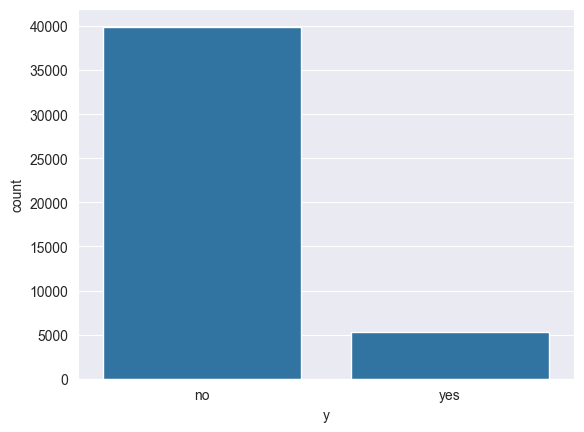

In [134]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here
count_plot = sns.countplot(data=df, x="y")

# the dataset is biased towards no

**Make the same count, but this time segment the data by the variable marital status. What can you observe?**

*Hint: use the `hue` parameter in calling `sns.countplot()`*

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')


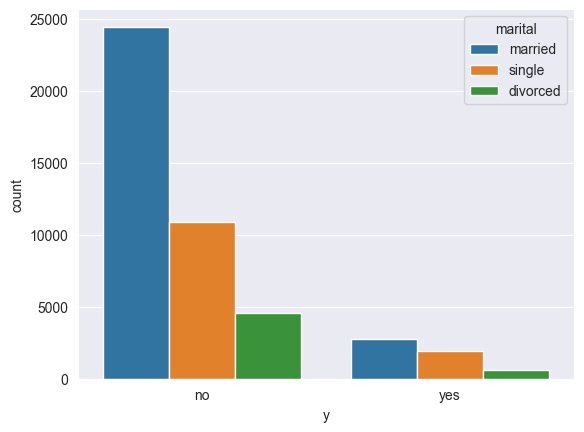

In [135]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here
print(df.columns)
count_by_marital_status = sns.countplot(data=df, x="y", hue="marital")

# married people are sampled most. The proportion of each marital status is similar in both yes and no

**Using `pandas`, create a boxplot of the balance variable. What can you conclude from the plot?**

use the `.boxplot()` method on `df`
you can control the y-axis with `plt.ylim(y_min, y_max)` if you want a closer look at the box

(-5000.0, 5000.0)

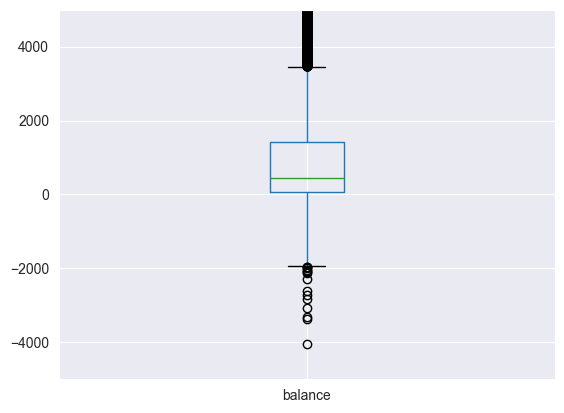

In [136]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here
balance_boxplot = df.boxplot(column="balance")
plt.ylim(-5000, 5000)
# there are a lot of outliers but the dataset is big and it doesn't seem to have a massive impact
# The distribution is skewed to the lower end
# The range of Q1 to Q3 is very narrow compared with the max values in the column

**Plot the boxplot of the `balance` variable, grouped by the output variable `y`. What can you say concerning the distribution of the variable between the yes and no groups?**

Note that the `y` variable should be along the x-axis, and `balance` should be on the y-axis.

use the `sns.boxplot()` function but specify both `x` and `y`

(-5000.0, 10000.0)

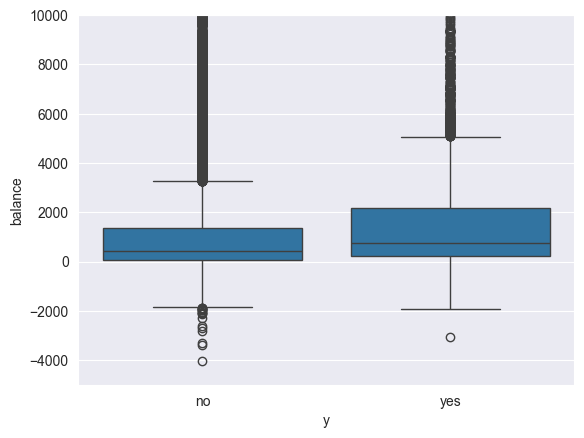

In [137]:
# We create a new figure to make sure other figures in the notebook don't get modified
plt.figure()

# Your code here:
balance_boxplot_grouped_by_y = sns.boxplot(data=df, y="balance", x="y")
plt.ylim(-5000, 10000)
# the distrabution of balances in the yes and no categories differ
# The median balance of the yeses is slightly higher
# Q1 limit is similar
# Q3 limit is higher in the yeses category

# Dataset Preprocessing 

<br>

**The `duration` column is in seconds. Let's convert the units to be in minutes.**

Create a copy of the dataframe called `df_new` using the `.copy()` function. Do this to avoid overwriting the original one.

Convert the `duration` column to be in minutes, and save it in the duration column

You can select the column like this `df_new["duration"]` and divide it by 60

In [138]:
# Your code here
df_new = df.copy()
df_new["duration"] = df_new["duration"]/60
df_new.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,4.350000,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,2.516667,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,1.266667,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,1.533333,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,3.300000,1,-1,0,unknown,no


**Convert the `job`, `education`, and `y` categorical variables into suitable format to be fed into a machine learning model (i.e. do some one-hot encoding)**

First, create a copy of `df_new` called `df_numerical`. This will avoid overwriting the original DataFrame.

Next, to convert the categorical variables into a binary vector representation:
- use the `pandas` function `get_dummies()`.
- add the `prefix` kwarg when dealing with `job` and `education` (`job` for the job feature, and `education` for the education feature)
- with col `y` we want to convert `no` and `yes` values into a binary representation (i.e. `0` and `1`)
    - Overwrite the `y` column in `df_numerical` with the output of `get_dummies()`
    - by default this method will create two columns, which is redundant: pass `drop_first=True` as a kwarg to prevent this
- Finally, concatenate the new variables to the `df_numerical` dataframe.

This function can convert a numerical column into a categorical one. The function considers the possible categorical values that your feature can assume, and creates a vector of the length of the possible values, with 1 or 0 depending if that particular value is present or not.


In [139]:
# Your code here
df_numerical = df_new.copy()

hot_jobs = pd.get_dummies(df_numerical["job"], prefix="job")
hot_education = pd.get_dummies(df_numerical["education"], prefix="education")
hot_y = pd.get_dummies(df_numerical["y"], drop_first=True)

df_numerical["y"] = hot_y

df_numerical = pd.concat([df_numerical, hot_jobs, hot_education], axis=1)

df_numerical.head()
# note that the original job and education columns are still present in the dataframe


,age,job,marital,education,default,balance,housing,loan,contact,day,...,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,education_primary,education_secondary,education_tertiary,education_unknown
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,False,False,False,False,False,False,False,False,True,False
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,False,False,False,True,False,False,False,True,False,False
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,False,False,False,False,False,False,False,True,False,False
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,False,False,False,False,False,False,False,False,False,True
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,False,False,False,False,False,True,False,False,False,True


**Make a new dataset with only `education_primary`, `education_secondary`, `education_tertiary`, `education_unknown`, `balance`, `duration`, `campaign`, `pdays`, `previous` and `y`.**

Create a new dataset from `df_numerical`, retaining only the columns `education_primary`, `education_secondary`, `education_tertiary`, `education_unknown`, `balance`, `duration`, `campaign`, `pdays`, `previous`. 

Save it in a new dataframe named `df_numerical_education`.

Remember to also use the `.copy()` method!

In [140]:
# Your code here
df_numerical_education = df_numerical.copy()
df_numerical_education = df_numerical_education[['education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'balance', 'duration', 'campaign', 'pdays', 'previous','y']]
df_numerical_education.head()


,education_primary,education_secondary,education_tertiary,education_unknown,balance,duration,campaign,pdays,previous,y
0,False,False,True,False,2143,4.350000,1,-1,0,False
1,False,True,False,False,29,2.516667,1,-1,0,False
2,False,True,False,False,2,1.266667,1,-1,0,False
3,False,False,False,True,1506,1.533333,1,-1,0,False
4,False,False,False,True,1,3.300000,1,-1,0,False


**Normalize the `df_numerical_education` dataset using min-max normalisation, and save it as a new variable called `df_scaled`.**

Given the dataset `df_numerical_education`, scale the values between the minimum and the maximum of the dataset, using.

The min max scaling formula (considering you want to scale between 0 and 1) is as follows: 

```Python
df_scaled=(originalDF - min_val_originalDF) / (max_val_originalDF - min_val_originalDF) 
```

In [141]:
# Your code here
df_scaled = df_numerical_education.copy()
numeric_cols = df_scaled.select_dtypes(include='number').columns.tolist()
print(numeric_cols)
for col in numeric_cols:
    df_scaled[col] = (df_numerical_education[col] - df_numerical_education[col].min()) / (df_numerical_education[col].max() - df_numerical_education[col].min())
df_scaled.head()


['balance', 'duration', 'campaign', 'pdays', 'previous']


,education_primary,education_secondary,education_tertiary,education_unknown,balance,duration,campaign,pdays,previous,y
0,False,False,True,False,0.092259,0.053070,0.0,0.0,0.0,False
1,False,True,False,False,0.073067,0.030704,0.0,0.0,0.0,False
2,False,True,False,False,0.072822,0.015453,0.0,0.0,0.0,False
3,False,False,False,True,0.086476,0.018707,0.0,0.0,0.0,False
4,False,False,False,True,0.072812,0.040260,0.0,0.0,0.0,False


# Fitting a logistic regression model 

**Divide the dataset into training and testing sets.**

Use the `train_test_split` from the `sklearn.model_selection` package to split the `df_scaled` dataframe into $4$ subsets: 
 - `X_train`
 - `X_test`
 - `y_train`
 - `y_test`

In doing so, specify the text size to be `0.3` and set the `random_state=101` for reproducibility.

In [142]:
# Your code here
y = df_scaled['y']
X = df_scaled.drop(['y'], axis=1)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=101)


In [143]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)


(31647, 9)
(13564, 9)
(31647,)
(13564,)


**Create a Logistic Regression model and fit it on the training data**

To do this create an instance of a LogisticRegression model from sklearn, call it `logmodel`

Then use the `.fit()` method to train the model on `X_train` and `y_train`

In [144]:
from sklearn.linear_model import LogisticRegression

# Your code here
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)


LogisticRegression()

**Use the `.predict()` method from your model to generate predictions on `X_test`**

Assign the output to a variable called `predictions`.

In [145]:
# Your code here
predictions = logmodel.predict(X_test)
predictions

array([False, False, False, ..., False, False, False])

Let's check out the accuracy score of your model. There are many ways to do this but let's use the classification report. Uncomment the code below. Is this a good model? Is `accuracy` a good metric?

1. Precision: Percentage of correct positive predictions relative to total positive predictions.

2. Recall: Percentage of correct positive predictions relative to total actual positives.

3. F1 Score: A weighted harmonic mean of precision and recall. The closer to 1, the better the model.

F1 Score: 2 * (Precision * Recall) / (Precision + Recall)

Using these three metrics, we can understand how well a given classification model is able to predict the outcomes for some response variable.

In [146]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

       False       0.90      0.99      0.94     11967
        True       0.64      0.16      0.25      1597

    accuracy                           0.89     13564
   macro avg       0.77      0.57      0.60     13564
weighted avg       0.87      0.89      0.86     13564



Is this a good model? Is `accuracy` a good metric?




The over all accuracy (0.89) looks pretty good but looking more closely we see that the model predicts no cases really well but is rubbish with yeses. Keep in mind that we as the bank want to predict yeses so we know who to focus our calls on. We can conclude that this model is not that helpful. Our model is most likely biased due to the bias in the dataset. It's just guessing that most responses are 'no'.
